In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
path = "Data Model - Pizza Sales.xlsx"
df = pd.read_excel(path, index_col="order_details_id")
df.head()

,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
order_details_id,,,,,,,,,,,
1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
df.columns

Index(['order_id', 'pizza_id', 'quantity', 'order_date', 'order_time',
       'unit_price', 'total_price', 'pizza_size', 'pizza_category',
       'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [4]:
df.drop(columns='order_id', axis=1, inplace=True)
df.head()

,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
order_details_id,,,,,,,,,,
1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
3,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
4,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
5,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 1 to 48620
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  object        
 1   quantity           48620 non-null  int64         
 2   order_date         48620 non-null  datetime64[ns]
 3   order_time         48620 non-null  object        
 4   unit_price         48620 non-null  float64       
 5   total_price        48620 non-null  float64       
 6   pizza_size         48620 non-null  object        
 7   pizza_category     48620 non-null  object        
 8   pizza_ingredients  48620 non-null  object        
 9   pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 4.1+ MB


In [6]:
df["order_time"] = pd.to_datetime(df.order_time, format='%H:%M:%S')



In [7]:
df["hours"] = df["order_time"].dt.hour

In [8]:
df["order_month"] = df["order_date"].dt.month

In [9]:
df["order_year"] = df["order_date"].dt.year
df["order_day"] = df["order_date"].dt.day


In [10]:
df["order_day"] = df["order_day"].replace([1,2,3,4,5,6,7], ['Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Wednesday'])

In [11]:
df["order_month"] = df["order_month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [12]:
print("avarage",df["total_price"].mean())
print("Total Sales", df["total_price"].sum())

avarage 16.821473673385437
Total Sales 817860.05


In [13]:
top_10_pizza = df["pizza_name"].value_counts().iloc[:15]
top_10_pizza

The Classic Deluxe Pizza             2416
The Barbecue Chicken Pizza           2372
The Hawaiian Pizza                   2370
The Pepperoni Pizza                  2369
The Thai Chicken Pizza               2315
The California Chicken Pizza         2302
The Sicilian Pizza                   1887
The Spicy Italian Pizza              1887
The Southwest Chicken Pizza          1885
The Four Cheese Pizza                1850
The Italian Supreme Pizza            1849
The Big Meat Pizza                   1811
The Vegetables + Vegetables Pizza    1510
The Mexicana Pizza                   1456
The Napolitana Pizza                 1451
Name: pizza_name, dtype: int64

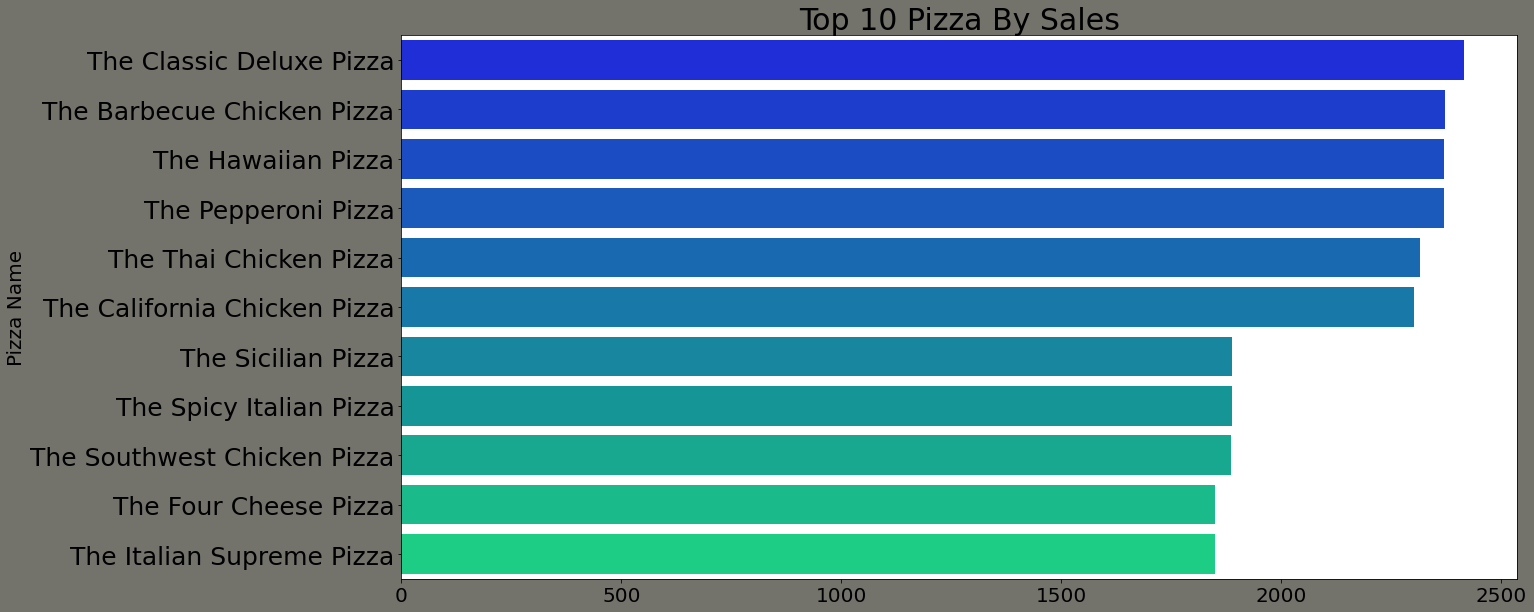

In [14]:
plt.figure(figsize=(20,10),facecolor= '#73726b')
sns.countplot(y= 'pizza_name' , data = df, palette="winter", order= df["pizza_name"].value_counts().iloc[:11].index)

plt.xticks(fontsize=20)

plt.yticks(fontsize=25)
plt.title("Top 10 Pizza By Sales", fontsize=30)
plt.xlabel("")
plt.ylabel("Pizza Name", fontsize=20)
plt.show()


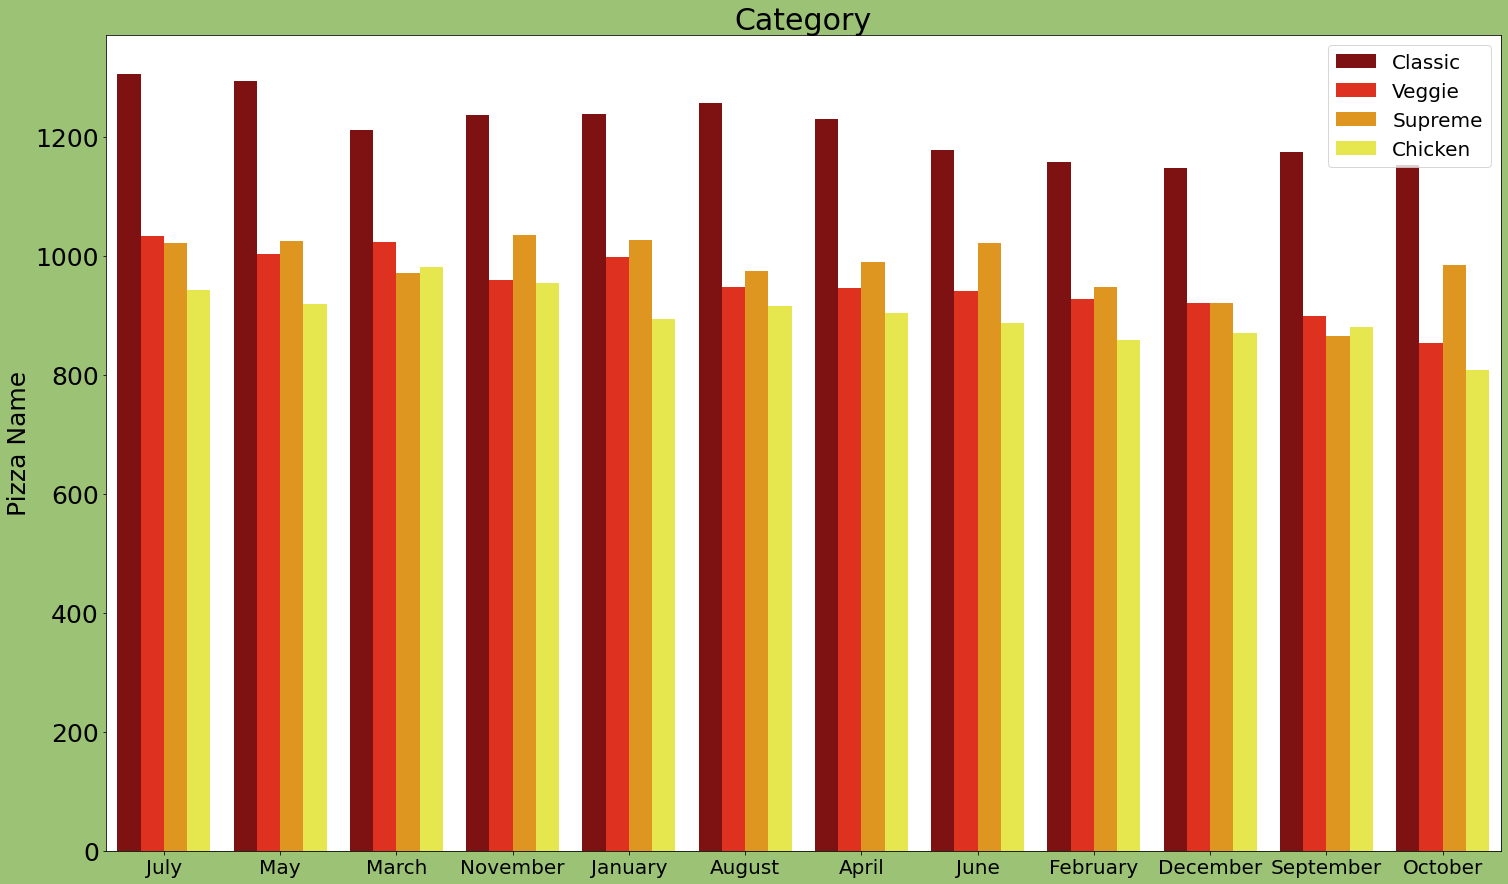

In [15]:
plt.figure(figsize=(25,15),facecolor= '#9cc276')
sns.countplot(data=df, x= "order_month" ,palette="hot", hue=df["pizza_category"], order=df["order_month"].value_counts().iloc[:].index)
plt.legend(prop={'size': 20})
plt.xticks(fontsize=20)

plt.yticks(fontsize=25)
plt.title("Category", fontsize=30)
plt.xlabel("")
plt.ylabel("Pizza Name", fontsize=25)
plt.show()

In [16]:
pie_new_df = df["pizza_size"].value_counts().rename_axis('size').reset_index(name='value')


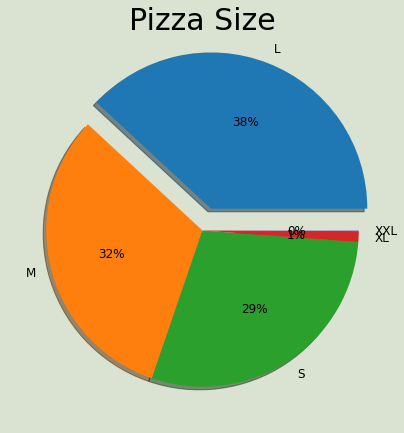

In [17]:
plt.figure(figsize=(7,10),facecolor= '#dae3d1')
plt.pie(x = pie_new_df["value"], shadow=True ,textprops={'fontsize':'12'} , explode= [0.15, 0, 0, 0, 0] , labels= pie_new_df["size"], autopct='%.0f%%' )

plt.yticks(fontsize=25)
plt.title("Pizza Size", fontsize=30)

plt.show()

In [45]:
new_df_hour = pd.DataFrame(df["hours"].value_counts())
x = new_df_hour.index
y = new_df_hour['hours']

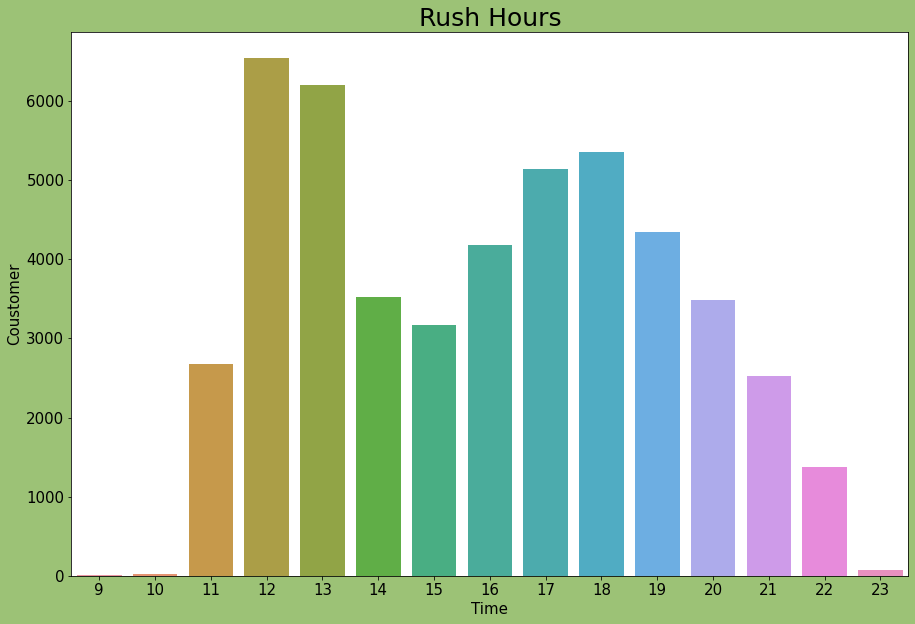

In [46]:
plt.figure(figsize=(15,10),facecolor= '#9cc276')

# sns.countplot(data=df, x= 'hours', palette='crest')
sns.barplot(x = x, y= y , )
plt.xticks(fontsize=15)

plt.yticks(fontsize=15)
plt.title("Rush Hours", fontsize=25)
plt.xlabel("Time",fontsize=15)
plt.ylabel("Coustomer", fontsize=15)



plt.show()

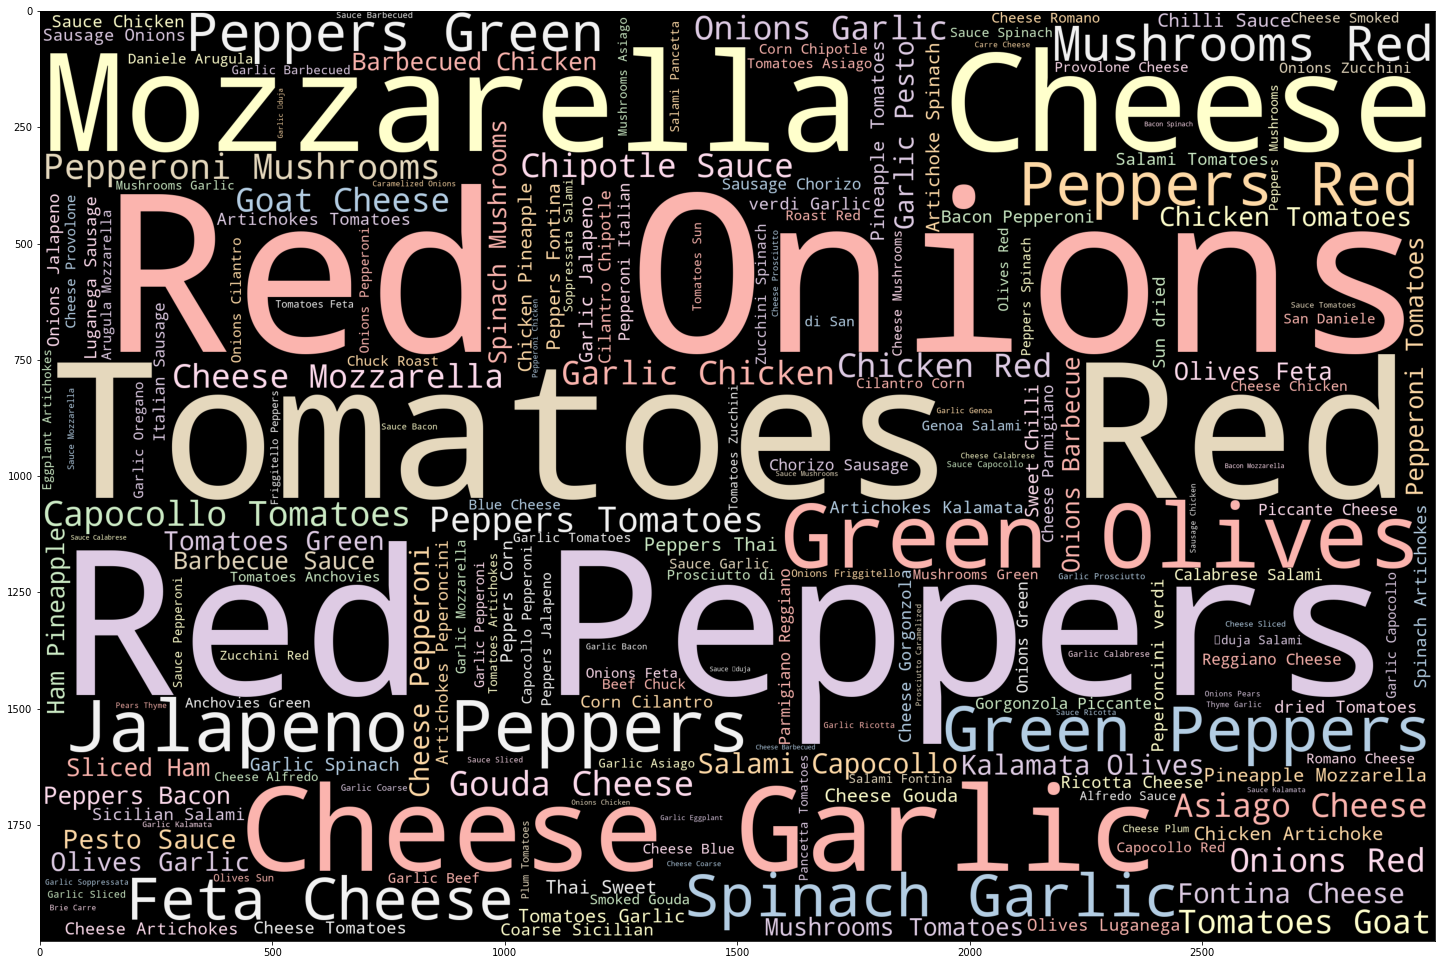

In [20]:
from wordcloud import WordCloud
plt.figure(figsize=(25,20))
text = " ".join(cat for cat in df.pizza_ingredients)

word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="black",
        colormap="Pastel1",
        ).generate(text)

plt.imshow(word_cloud)

plt.show()